<a href="https://colab.research.google.com/github/rroszczyk/Python/blob/master/probability/pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pyswarms

     |████████████████████████████████| 104 kB 5.2 MB/s 


In [ ]:
# Import modules
import numpy as np
# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx

In [ ]:
# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)
# Perform optimization
cost, pos = optimizer.optimize(fx.sphere, iters=1000)

2021-12-17 19:58:12,300 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=6.65e-42
2021-12-17 19:58:14,768 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.651584198823643e-42, best pos: [-9.27237222e-22  2.40661907e-21]


In [ ]:
import matplotlib.pyplot as plt
from pyswarms.utils.plotters import plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Designer
from pyswarms.utils.plotters.formatters import Mesher

In [ ]:
# for better plotting
m = Mesher(func=fx.sphere)

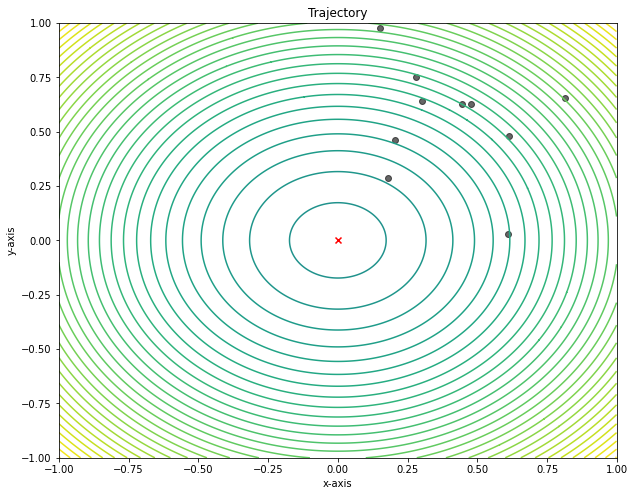

In [ ]:
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

In [ ]:
animation.save('mymovie.mp4')

2021-12-17 19:58:21,718 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-12-17 19:58:21,723 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y mymovie.mp4


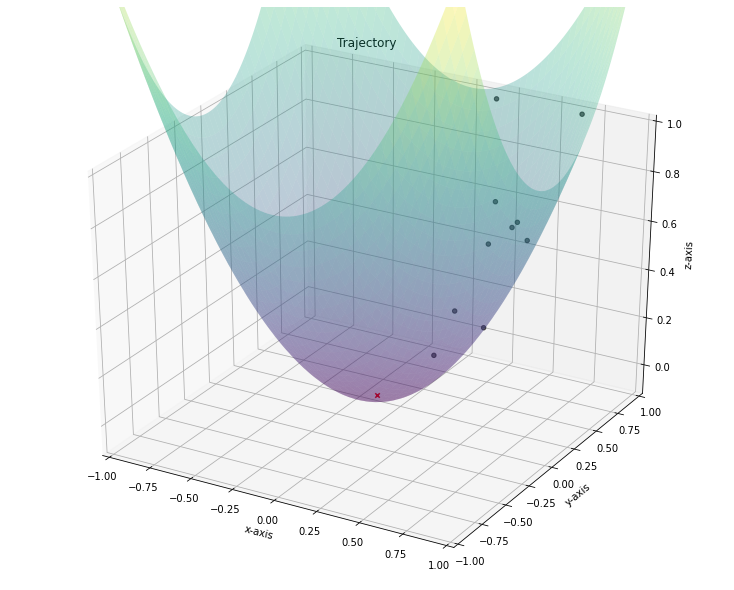

In [ ]:
# preprocessing
pos_history_3d = m.compute_history_3d(optimizer.pos_history)
# adjust the figure
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))               # Mark minima

In [ ]:
animation3d.save('sphere.mp4')

2021-12-17 20:00:50,414 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2021-12-17 20:00:50,418 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y sphere.mp4
